# 银行客户流失预警模型

银行客户数据变量名称：
---
* CUST_ID 用户ID
* OPEN_ACC_DUR 开户时长
* AGE 年龄
* GENDER_CD性别
* HASNT_HOME_ADDRESS_INF 家庭住址
* HASNT_MOBILE_TEL_NUM_INF 电话信息
* LOCAL_CUR_SAV_SLOPE 本币活期储蓄波动率
* LOCAL_CUR_MON_AVG_BAL 本币活期月均余额
* LOCAL_CUR_MON_AVG_BAL_PROP 本币活期月均月占比
* LOCAL_CUR_ACCT(account)_NUM 本币活期帐户数
* LOCAL_OVEONEYR_FF_MON_AVG_BAL 本币一年以上整整季日均余额
* LOCAL_FIX_MON_AVG_BAL 本币定期月均余额
* LOCAL_FIX_MON_AVG_BAL_PROP 本币定期月均余额比例
* LOCAL_BELONEYR_FF_SLOPE 本币一年以下整整波动率
* LOCAL_BELONEYR_FF_MON_AVG_BAL 本币一年以下整整季日均余额
* LOCAL_OVEONEYR_FF_SLOPE 本币一年以上整整波动率
* LOCAL_SAV_SLOPE 本币存款波动率
* LOCAL_SAV_CUR_ALL_BAL 本币活期存款总余额
* LOCAL_SAV_MON_AVG_BAL 本币存款月均余额
* SAV_SLOPE 存款波动率
* SAV_CUR_ALL_BAL 活期存款总余额
* SAV_MON_AVG_BAL 存款月均余额
* FR_SAV_CUR_ALL_BAL 
* ASSET_CUR_ALL_BAL 活期资产总余额
* ASSET_MON_AVG_BAL 资产月均余额 
* LOCAL_CUR_TRANS_TX_AMT 本币活期转账交易笔数 
* LOCAL_CUR_TRANS_TX_NUM 本币活期转账交易总数 
* LOCAL_CUR_LASTSAV_TX_AMT 本币活期续存交易金额 
* LOCAL_CUR_LASTSAV_TX_NUM 本币活期续存交易笔数
* LOCAL_CUR_WITHDRAW_TX_AMT 本币活期存款金额
* LOCAL_CUR_WITHDRAW_TX_NUM 本币活期存款笔数
* LOCAL_FIX_OPEN_ACC_TX_NUM 本币定期开户交易笔数
* LOCAL_FIX_OPEN_ACC_TX_AMT 本币定期开户交易金额
* LOCAL_FIX_WITHDRAW_TX_NUM 本币定期存款交易笔数       
* LOCAL_FIX_WITHDRAW_TX_AMT 本币定期存款交易金额       
* LOCAL_FIX_CLOSE_ACC_TX_NUM 本币定期销户笔数    
* LOCAL_FIX_CLOSE_ACC_TX_AMT 本币定期销户总金额     
* L6M_INDFINA_ALL_TX_NUM 最近六个月个人理财总交易数目
* L6M_INDFINA_ALL_TX_AMT 最近六个月个人理财总交易金额
* POS_CONSUME_TX_AMT 客户POS财务类交易总金额
* POS_CONSUME_TX_NUM 客户POS交易总数目
* ATM_ACCT_TX_NUM ATM交易总数目
* ATM_ACCT_TX_AMT AMT交易总金额
* ATM_NOT_ACCT_TX_NUM ATM非财务类交易数目    
* ATM_ALL_TX_NUM ATM总交易数目
* COUNTER_NOT_ACCT_TX_NUM 柜面非财务交易数目  
* COUNTER_ACCT_TX_AMT 柜面财务交易总金额
* COUNTER_ACCT_TX_NUM 柜面财务交易总数目     
* COUNTER_ALL_TX_NUM 柜面总交易数目
* NAT_DEBT_OPEN_ACC_DUR 国债开户时长 
* FINA_OPEN_ACC_DUR 委托理财开户时长    
* FUND_OPEN_ACC_DUR 代理基金开户时长  
* TELEBANK_ALL_TX_NUM 手机银行交易总数
* CHURN_CUST_IND 流失客户

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import itertools

from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set(style = "darkgrid")

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("bankChurn.csv")
print(data.shape)
data.head()

(17241, 54)


,CUST_ID,OPEN_ACC_DUR,AGE,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,...,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
0,1,231,82,1,Y,N,0.000000,0.00,0.000000,0,...,0,0,12270,1,1,0,0,0,0,1
1,2,48,42,1,Y,N,1.005692,20149.04,0.264435,3,...,2,1,95024,6,7,0,0,0,0,1
2,3,102,31,2,Y,N,0.000562,17.81,1.000000,1,...,0,0,0,0,0,0,0,0,0,1
3,4,62,78,2,Y,N,-0.550912,29359.21,1.000000,1,...,1,0,0,0,0,0,0,0,0,1
4,5,79,46,1,Y,N,0.000288,34.68,1.000000,1,...,0,0,0,0,0,0,0,0,0,1


## 数据预处理

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17241 entries, 0 to 17240
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUST_ID                        17241 non-null  int64  
 1   OPEN_ACC_DUR                   17241 non-null  int64  
 2   AGE                            17241 non-null  int64  
 3   GENDER_CD                      17241 non-null  int64  
 4   HASNT_HOME_ADDRESS_INF         17241 non-null  object 
 5   HASNT_MOBILE_TEL_NUM_INF       17241 non-null  object 
 6   LOCAL_CUR_SAV_SLOPE            17241 non-null  float64
 7   LOCAL_CUR_MON_AVG_BAL          17241 non-null  float64
 8   LOCAL_CUR_MON_AVG_BAL_PROP     17241 non-null  float64
 9   LOCAL_CUR_ACCT_NUM             17241 non-null  int64  
 10  LOCAL_OVEONEYR_FF_MON_AVG_BAL  17241 non-null  float64
 11  LOCAL_FIX_MON_AVG_BAL          17241 non-null  float64
 12  LOCAL_FIX_MON_AVG_BAL_PROP     17241 non-null 

In [5]:
#查看各列是否存在缺失值
data.isnull().sum()/len(data)

CUST_ID                          0.0
OPEN_ACC_DUR                     0.0
AGE                              0.0
GENDER_CD                        0.0
HASNT_HOME_ADDRESS_INF           0.0
HASNT_MOBILE_TEL_NUM_INF         0.0
LOCAL_CUR_SAV_SLOPE              0.0
LOCAL_CUR_MON_AVG_BAL            0.0
LOCAL_CUR_MON_AVG_BAL_PROP       0.0
LOCAL_CUR_ACCT_NUM               0.0
LOCAL_OVEONEYR_FF_MON_AVG_BAL    0.0
LOCAL_FIX_MON_AVG_BAL            0.0
LOCAL_FIX_MON_AVG_BAL_PROP       0.0
LOCAL_BELONEYR_FF_SLOPE          0.0
LOCAL_BELONEYR_FF_MON_AVG_BAL    0.0
LOCAL_OVEONEYR_FF_SLOPE          0.0
LOCAL_SAV_SLOPE                  0.0
LOCAL_SAV_CUR_ALL_BAL            0.0
LOCAL_SAV_MON_AVG_BAL            0.0
SAV_SLOPE                        0.0
SAV_CUR_ALL_BAL                  0.0
SAV_MON_AVG_BAL                  0.0
FR_SAV_CUR_ALL_BAL               0.0
ASSET_CUR_ALL_BAL                0.0
ASSET_MON_AVG_BAL                0.0
LOCAL_CUR_TRANS_TX_AMT           0.0
LOCAL_CUR_TRANS_TX_NUM           0.0
L

0    15500
1     1741
Name: CHURN_CUST_IND, dtype: int64
0    0.89902
1    0.10098
Name: CHURN_CUST_IND, dtype: float64


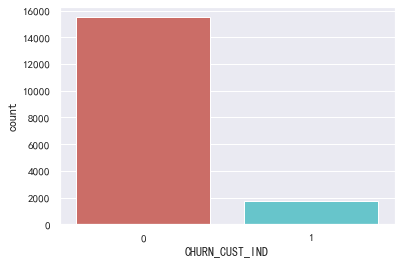

In [6]:
print(data['CHURN_CUST_IND'].value_counts())
print(data['CHURN_CUST_IND'].value_counts()/len(data))
sns.countplot(x = 'CHURN_CUST_IND', data = data, palette='hls')
plt.show()

In [7]:
# 标签编码
from sklearn.preprocessing import LabelEncoder

data["HASNT_HOME_ADDRESS_INF"] = LabelEncoder().fit_transform(data['HASNT_HOME_ADDRESS_INF'])
data["HASNT_MOBILE_TEL_NUM_INF"] = LabelEncoder().fit_transform(data['HASNT_MOBILE_TEL_NUM_INF'])

## 划分出3/4训练集和1/4测试集

In [8]:
df_train, df_test = train_test_split(data, test_size = 0.25, random_state = 2020)

In [9]:
print(df_train.shape)
print(df_test.shape)

(12930, 54)
(4311, 54)


In [10]:
X = df_train.drop(["CUST_ID", "CHURN_CUST_IND"], axis = 1)
y = df_train["CHURN_CUST_IND"]
X_test = df_test.drop(["CUST_ID", "CHURN_CUST_IND"], axis = 1)
y_test = df_test["CHURN_CUST_IND"]

## 二分类柱状图

In [11]:
def bar_plt(data, feature, label):
    plt.figure(figsize = (10, 6))
    sns.barplot(x = label, y = feature, data = data)

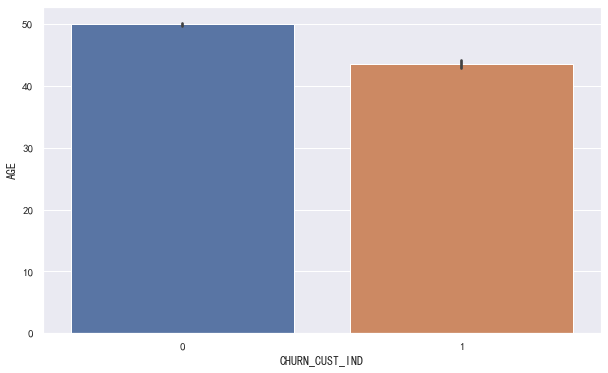

In [12]:
bar_plt(data, data['AGE'], data['CHURN_CUST_IND'])

## 相关系数热力图

In [13]:
def corr_plt(data, feature, start=0, end=-1):
    corr = data[feature[start:end]].corr()
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, cmap = 'YlGnBu')

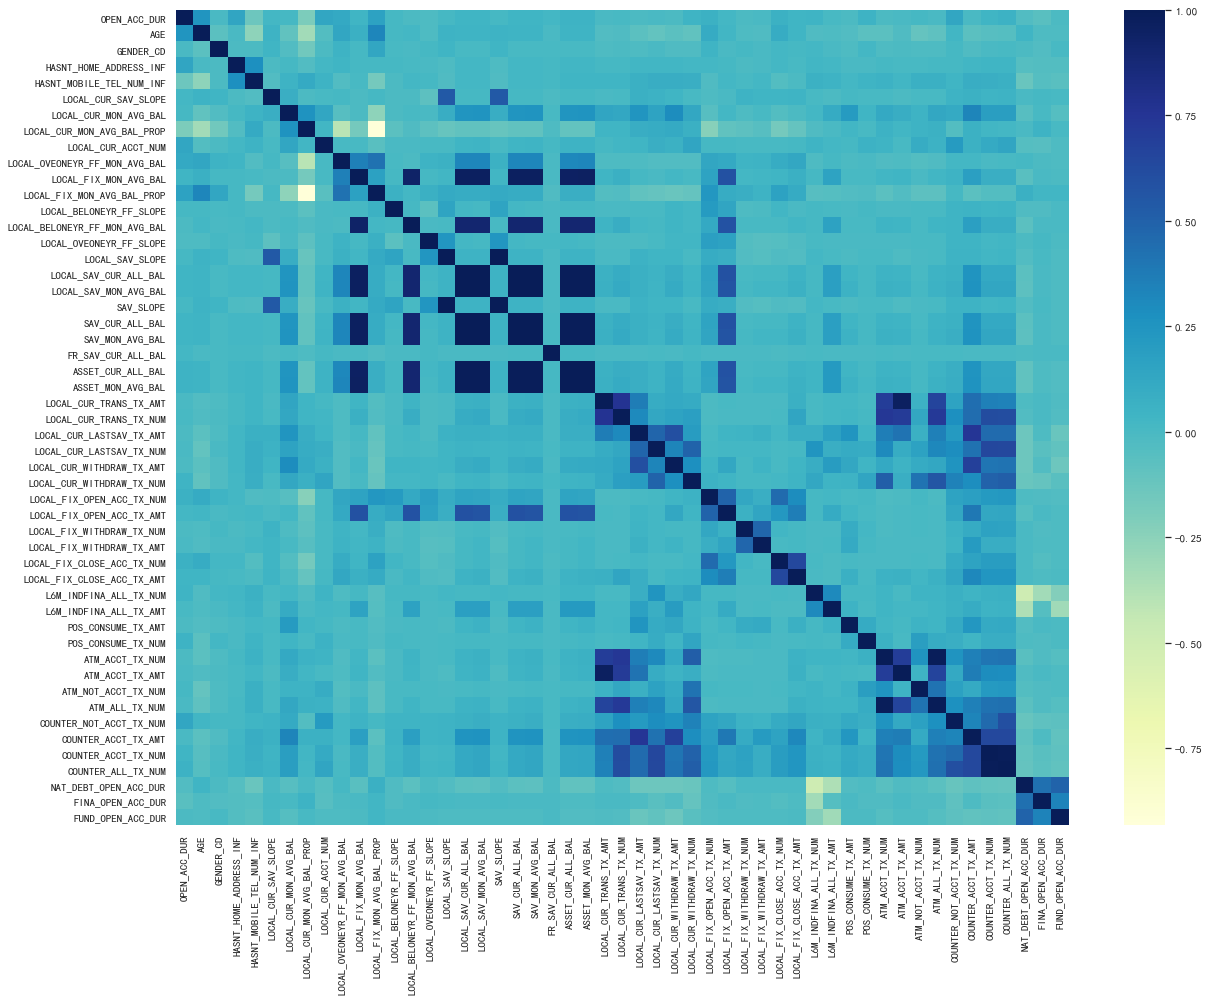

In [14]:
feature = [x for x in data.columns if x not in ['CUST_ID', 'CHURN_CUST_IND']]
corr_plt(data, feature)

## 建立模型

In [15]:
clf = LGBMClassifier(learning_rate=0.4, 
                     max_depth=3, 
                     n_estimators = 190,  
                     num_leaves = 770, 
                     min_data_in_bin=5,
                     objective='binary', 
                     boosting_type='gbdt')

## 5折交叉验证训练模型并输出名单

In [16]:
def train_5_cross(X, y, X_test, y_test, thresholds=0.45):
    val_auc_num = 0
    val_recall_num = 0
    val_precision_num = 0
    test_auc_num = 0
    test_recall_num = 0
    test_precision_num = 0
    y_pred_input = np.zeros(len(X_test))
    print("======开始训练======")
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
        print("第{}次训练...".format(fold_ + 1))
        trn_x, trn_y = X.iloc[trn_idx], y.iloc[trn_idx]
        val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
        
        clf.fit(trn_x, trn_y, 
                eval_set=[(trn_x, trn_y), (val_x, val_y)], 
                verbose=0,
                early_stopping_rounds=100, 
                eval_metric='f1')
        
        # ======计算验证集的AUC值======
        y_prb = clf.predict_proba(val_x)[:,1]
        fpr, tpr, thres = roc_curve(val_y, y_prb)
        val_roc_auc = auc(fpr, tpr)
        val_auc_num += val_roc_auc
        print("验证集AUC值为：{0:.4}".format(val_roc_auc))
        
        # ======计算测试集的AUC值======
        y_test_prb = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thres = roc_curve(y_test, y_test_prb)
        test_roc_auc = auc(fpr, tpr)
        test_auc_num += test_roc_auc
        print("测试集AUC值为：{0:.4}".format(test_roc_auc))
        
        # ======计算验证集的精确率和召回率======
        y_pre_proba = clf.predict_proba(val_x.values)
        y_predictions = y_pre_proba[:, 1]>thresholds
        cnf_matrix = confusion_matrix(val_y, y_predictions)
        np.set_printoptions(precision = 2)
        val_recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
        val_precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
        print("验证集召回率为：{0:0.4f}, 精确率为：{1:0.4f}".format(val_recall, val_precision))
        val_recall_num += float(val_recall)
        val_precision_num += float(val_precision)
        
        # ======计算测试集的精确率和召回率======
        y_pre_proba_test = clf.predict_proba(X_test.values)
        y_predictions_test = y_pre_proba_test[:, 1]>thresholds
        cnf_matrix_test = confusion_matrix(y_test, y_predictions_test)
        np.set_printoptions(precision=2)
        
        test_recall = cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1])
        test_precision = cnf_matrix_test[1,1]/(cnf_matrix_test[0,1]+cnf_matrix_test[1,1])
        print("测试集召回率为：{0:0.4f}, 精确率为：{1:0.4f}".format(test_recall, test_precision))
        test_recall_num += float(test_recall)
        test_precision_num += float(test_precision)
        y_pred_input += y_pre_proba_test[:, 1]
    print("-"*38)
    print("5折交叉验证：")
    print("验证集AUC值为：{0:.4f}".format(val_auc_num/5))
    print("测试集AUC值为：{0:.4f}".format(test_auc_num/5))
    
    print("验证集召回率为：{0:.4f}，精确率为：{1:.4f}".format(
        val_recall_num/5, val_precision_num/5))
    print("测试集召回率为：{0:.4f}，精确率为：{1:.4f}".format(
        test_recall_num/5, test_precision_num/5))
    
    print("======输出名单======")
    y_pred_input_end = y_pred_input/5
    y_pred_input_precision = y_pred_input_end > thresholds
    submission = pd.DataFrame({"id": df_test['CUST_ID'],
                               "Probability": y_pred_input_end})
    print(submission.head())

In [17]:
train_5_cross(X, y, X_test, y_test)

======开始训练======
第1次训练...
验证集AUC值为：0.8414
测试集AUC值为：0.8516
验证集召回率为：0.2835, 精确率为：0.6325
测试集召回率为：0.2569, 精确率为：0.6512
第2次训练...
验证集AUC值为：0.8438
测试集AUC值为：0.8495
验证集召回率为：0.2989, 精确率为：0.6341
测试集召回率为：0.2500, 精确率为：0.6301
第3次训练...
验证集AUC值为：0.8691
测试集AUC值为：0.8503
验证集召回率为：0.2299, 精确率为：0.6061
测试集召回率为：0.2592, 精确率为：0.6532
第4次训练...
验证集AUC值为：0.863
测试集AUC值为：0.8438
验证集召回率为：0.3065, 精确率为：0.6452
测试集召回率为：0.2752, 精确率为：0.6122
第5次训练...
验证集AUC值为：0.8343
测试集AUC值为：0.8581
验证集召回率为：0.2222, 精确率为：0.5631
测试集召回率为：0.2500, 精确率为：0.6450
--------------------------------------
5折交叉验证：
验证集AUC值为：0.8503
测试集AUC值为：0.8507
验证集召回率为：0.2682，精确率为：0.6162
测试集召回率为：0.2583，精确率为：0.6383
======输出名单======
          id  Probability
10232  10233     0.006476
3110    3111     0.187281
1219    1220     0.897449
10757  10758     0.010145
7771    7772     0.044489


## 提取重要特征重新训练

In [18]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

def importance_plt(X, clf):
    feats_list = X.columns.values
    feats_importance = clf.feature_importances_
    sorted_idx = np.argsort(feats_importance)
    plt.figure(figsize=(10, 25))
    plt.barh(range(len(sorted_idx)), feats_importance[sorted_idx])
    plt.yticks(range(len(sorted_idx)), feats_list[sorted_idx], fontsize = 15)
    plt.xlabel("Importance", fontsize = 15)
    plt.title("Feature Importances", fontsize = 18)
    plt.show()

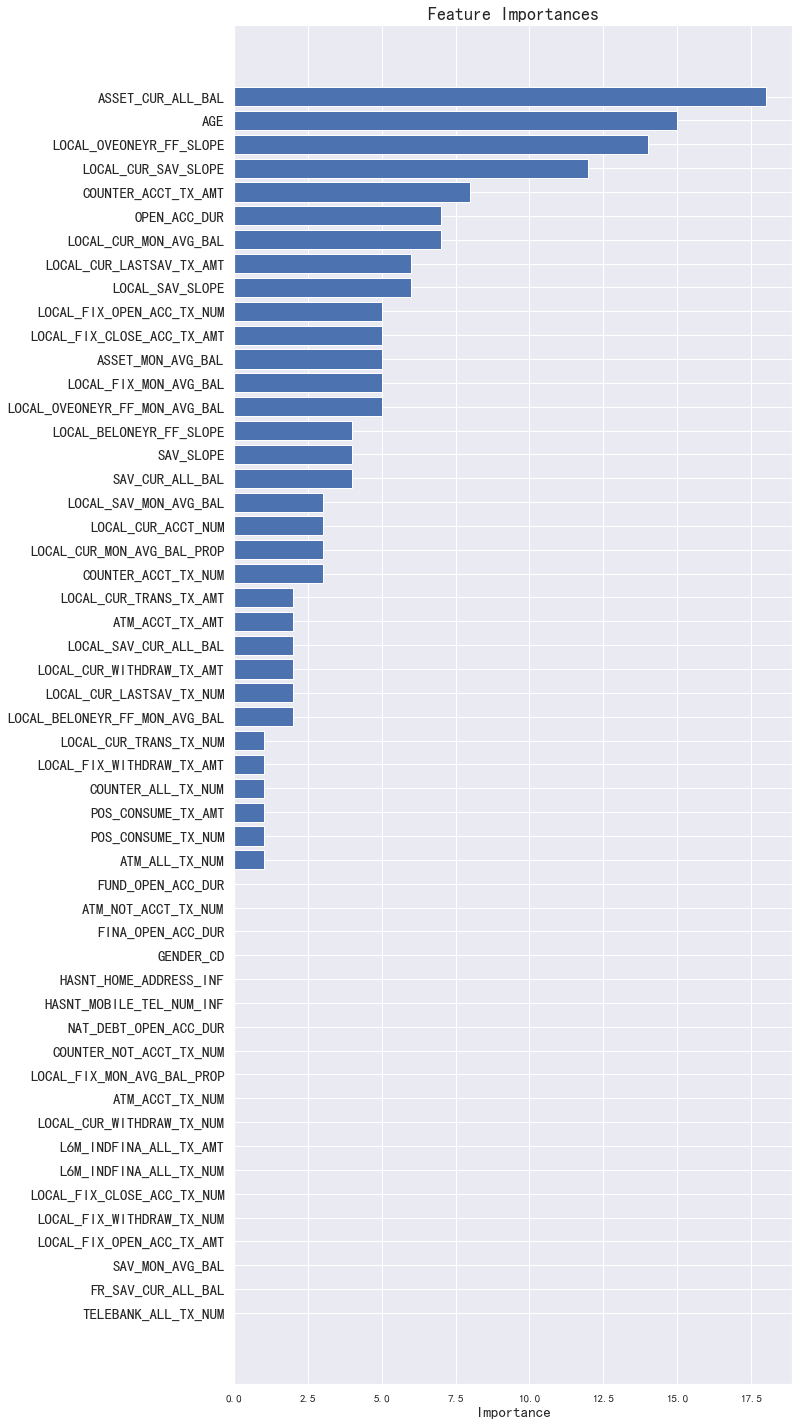

In [19]:
importance_plt(X, clf)

In [20]:
def feature_important_selection(X, num, clf):
    feature_importance = pd.Series(index = X.columns, 
                                   data = clf.feature_importances_)
    n_selected_features = (feature_importance > num).sum()
    print('{0:d} features retained {1:0.2f}%'.format(
        n_selected_features, (n_selected_features/len(feature_importance))*100))

In [21]:
# 剔除重要程度为0的特征
feature_important_selection(X, 0, clf)

33 features retained 63.46%


In [22]:
feature_importance = pd.Series(index = X.columns, data = clf.feature_importances_)
feature_importance = feature_importance.sort_values(ascending=False)
new_X = X[feature_importance.index].iloc[:, :33]
new_X_test = X_test[feature_importance.index].iloc[:, :33]

In [23]:
train_5_cross(new_X, y, new_X_test, y_test)

======开始训练======
第1次训练...
验证集AUC值为：0.8468
测试集AUC值为：0.8525
验证集召回率为：0.3027, 精确率为：0.6320
测试集召回率为：0.2546, 精确率为：0.6271
第2次训练...
验证集AUC值为：0.844
测试集AUC值为：0.8523
验证集召回率为：0.2874, 精确率为：0.6522
测试集召回率为：0.2500, 精确率为：0.6089
第3次训练...
验证集AUC值为：0.875
测试集AUC值为：0.8477
验证集召回率为：0.2529, 精确率为：0.6600
测试集召回率为：0.2592, 精确率为：0.6608
第4次训练...
验证集AUC值为：0.8624
测试集AUC值为：0.8527
验证集召回率为：0.3295, 精确率为：0.6565
测试集召回率为：0.2683, 精确率为：0.5939
第5次训练...
验证集AUC值为：0.8343
测试集AUC值为：0.8581
验证集召回率为：0.2222, 精确率为：0.5631
测试集召回率为：0.2500, 精确率为：0.6450
--------------------------------------
5折交叉验证：
验证集AUC值为：0.8525
测试集AUC值为：0.8527
验证集召回率为：0.2789，精确率为：0.6328
测试集召回率为：0.2564，精确率为：0.6272
======输出名单======
          id  Probability
10232  10233     0.008807
3110    3111     0.189521
1219    1220     0.896959
10757  10758     0.011592
7771    7772     0.056086


## 模型效果评估(评估测试集数据)

### KS

In [24]:
def metrics_ks(y, y_predicted):
    fpr, tpr, thres = roc_curve(y, y_predicted, pos_label=1)
    ks = abs(fpr - tpr).max()
    return ks

In [25]:
y_predicted = clf.predict_proba(new_X_test)[:, 1]
print("KS值: {0:.4f}".format(metrics_ks(y_test, y_predicted)))

KS值: 0.5535


### ROC-AUC

In [26]:
def roc_plot(X, y):
    y_pre = clf.predict(X)
    y_prb_1 = clf.predict_proba(X)[:,1]
    fpr, tpr, thres = roc_curve(y, y_prb_1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize = (10, 7))
    plt.plot(fpr, tpr, label="AUC = {0:.4f}".format(roc_auc), ms=100)
    plt.title("ROC曲线", fontsize=20)
    plt.legend(loc='lower right', fontsize=18)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('误判率', fontsize=15)
    plt.ylabel('命中率', fontsize=15)
    plt.show()
    acc_score = accuracy_score(y, y_pre)
    print("Accuracy: {0:.2f}%".format(acc_score * 100))

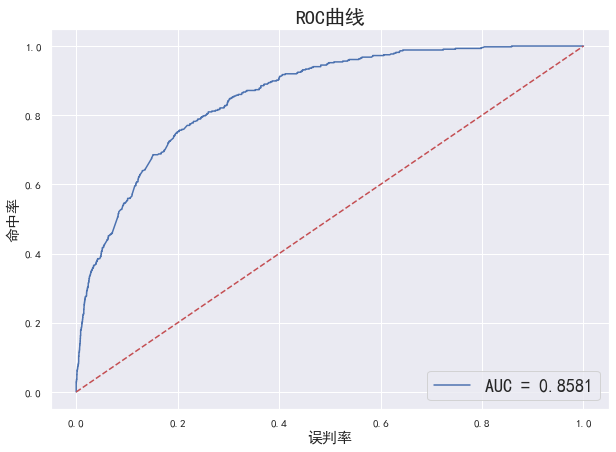

Accuracy: 90.88%


In [27]:
roc_plot(new_X_test, y_test)

### Confusion Matrix

In [28]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                 horizontalalignment='center', 
                 color='white' if cm[i, j]> thresh else 'black')
        plt.tight_layout()
        plt.ylabel("True label", fontsize = 15)
        plt.xlabel("Predicted label", fontsize = 15)
        plt.title("Confusion Matrix", fontsize = 20)

def metrics_plot_confusion_matrix(X, y, thres=0.45):
    y_pred_proba = clf.predict_proba(X.values)
    y_prediction = y_pred_proba[:, 1] > thres
    cnf_matrix = confusion_matrix(y, y_prediction)
    np.set_printoptions(precision=2)
    val_recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    val_precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes = class_names)
    plt.show()
    print('测试集的召回率为：{0:.2f}%，精确率为：{1:.2f}%'.format(
        float(val_recall)*100, float(val_precision)*100))

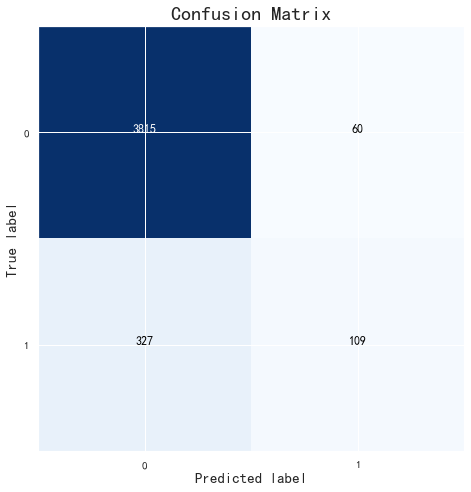

测试集的召回率为：25.00%，精确率为：64.50%


In [29]:
metrics_plot_confusion_matrix(new_X_test, y_test)